In [1]:
pip install pandas

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
data=pd.read_csv("car data.csv")
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
data['Owner'].value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

In [6]:
data.isnull().sum()/len(data)*100

Car_Name         0.0
Year             0.0
Selling_Price    0.0
Present_Price    0.0
Kms_Driven       0.0
Fuel_Type        0.0
Seller_Type      0.0
Transmission     0.0
Owner            0.0
dtype: float64

#EXPLORATORY DATA ANALYSIS AND FEATURE ENGINEERING

In [7]:
data['Owner'].value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

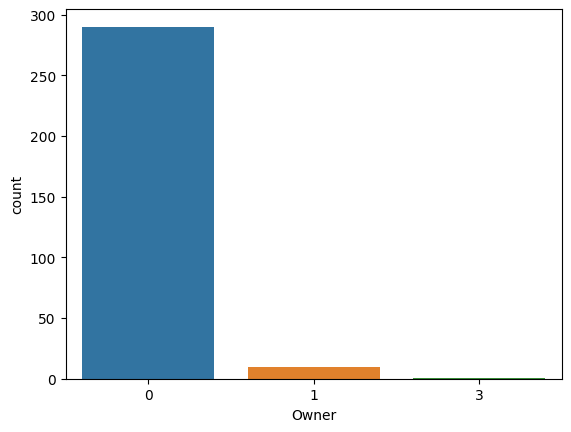

In [8]:
sns.countplot(x=data['Owner'])
plt.show()

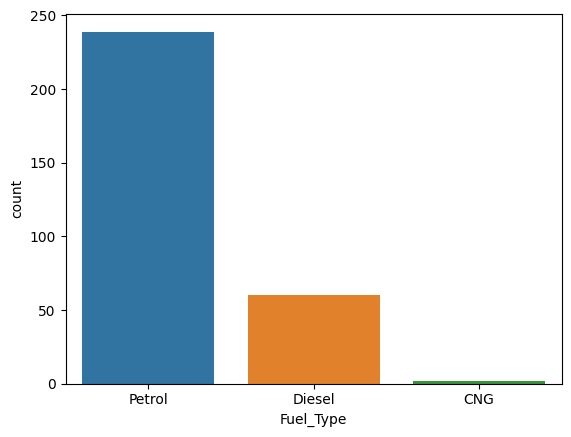

In [9]:
sns.countplot(x=data['Fuel_Type'])
plt.show()

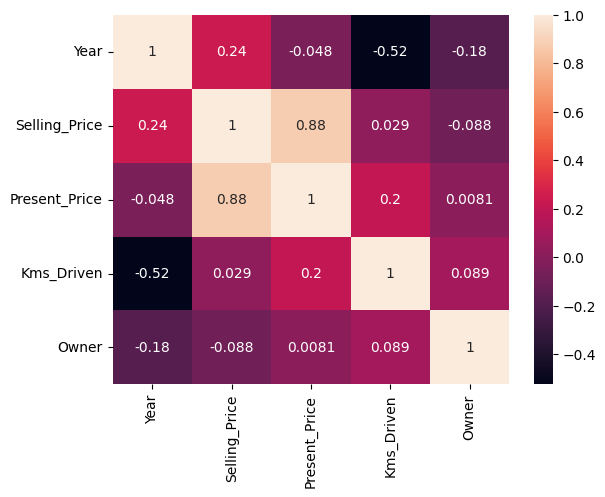

In [10]:
sns.heatmap(data.corr(),annot=True)
plt.show()

In [11]:
num_col=data.select_dtypes(include=['int','float']).columns

In [12]:
num_col

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner'], dtype='object')

In [13]:
cat_col=data.select_dtypes(include=['O']).columns
cat_col

Index(['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [14]:
data.drop(['Car_Name'],axis=1,inplace=True)

In [15]:
data['Age']=2023-data['Year']

In [16]:
data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


In [17]:
data.drop(['Year'],axis=1,inplace=True)

In [18]:
data.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


In [19]:
cat_col=data.select_dtypes(include=['O']).columns
cat_col

Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [20]:
data['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [21]:
data['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [22]:
data['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [23]:
data['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [24]:
data['Seller_Type'].value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [25]:
data['Transmission'].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [26]:
data=pd.get_dummies(data=data,drop_first=True)

In [27]:
data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,0,1,0,1
1,4.75,9.54,43000,0,10,1,0,0,1
2,7.25,9.85,6900,0,6,0,1,0,1
3,2.85,4.15,5200,0,12,0,1,0,1
4,4.60,6.87,42450,0,9,1,0,0,1


In [28]:
data[data['Seller_Type_Individual']==1]

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
27,6.00,6.49,16200,0,6,0,1,1,1
37,0.35,2.28,127000,0,20,0,1,1,1
53,16.00,30.61,135000,0,10,1,0,1,0
54,2.75,10.21,90000,0,18,0,1,1,1
85,2.50,23.73,142000,3,17,0,1,1,0
...,...,...,...,...,...,...,...,...,...
196,0.17,0.52,500000,0,15,0,1,1,0
197,0.16,0.51,33000,0,13,0,1,1,1
198,0.15,0.57,35000,1,12,0,1,1,1
199,0.12,0.58,53000,0,16,0,1,1,1


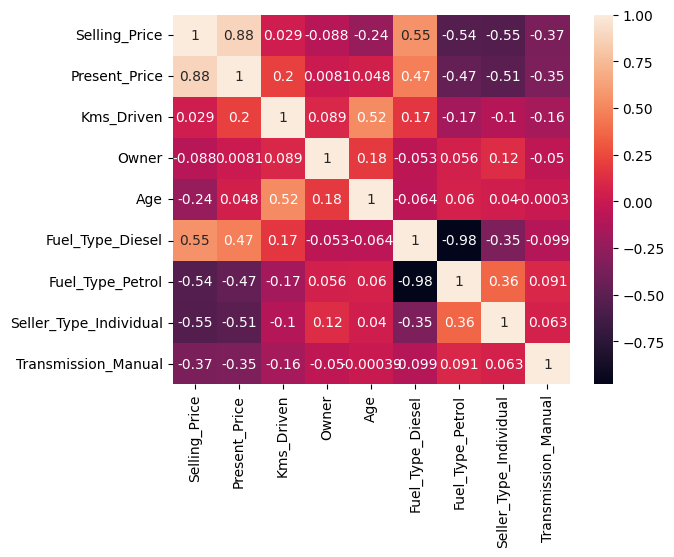

In [29]:
sns.heatmap(data.corr(),annot=True)
plt.show()

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
data.keys()

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner', 'Age',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual'],
      dtype='object')

In [32]:
x=data[['Present_Price', 'Kms_Driven', 'Owner', 'Age',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual']]

In [33]:
x

,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,9,0,1,0,1
1,9.54,43000,0,10,1,0,0,1
2,9.85,6900,0,6,0,1,0,1
3,4.15,5200,0,12,0,1,0,1
4,6.87,42450,0,9,1,0,0,1
...,...,...,...,...,...,...,...,...
296,11.60,33988,0,7,1,0,0,1
297,5.90,60000,0,8,0,1,0,1
298,11.00,87934,0,14,0,1,0,1
299,12.50,9000,0,6,1,0,0,1


In [34]:
y=data[['Selling_Price']]

In [35]:
y

,Selling_Price
0,3.35
1,4.75
2,7.25
3,2.85
4,4.60
...,...
296,9.50
297,4.00
298,3.35
299,11.50


In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=123)

In [38]:
sc=StandardScaler()

In [39]:
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [40]:
model1=LinearRegression()

In [41]:
model1.fit(x_train,y_train)

LinearRegression()

In [42]:
y_train_pred=model1.predict(x_train)
y_test_pred=model1.predict(x_test)

In [43]:
def metrics_lr(y_actual,y_pred):
    MSE=round(mean_squared_error(y_actual,y_pred),2)
    print("MSE:",MSE)
    RMSE=round(np.sqrt(MSE),2)
    print("RMSE:",RMSE)
    R2score=round(r2_score(y_actual,y_pred),2)
    print("R2 Score",R2score)

In [44]:
print("Train Data")
metrics_lr(y_train,y_train_pred)
print("Test Data")
metrics_lr(y_test,y_test_pred)

Train Data
MSE: 2.95
RMSE: 1.72
R2 Score 0.89
Test Data
MSE: 5.68
RMSE: 2.38
R2 Score 0.69


In [45]:
from sklearn.ensemble import RandomForestRegressor

In [46]:
model2=RandomForestRegressor()

In [47]:
model2.fit(x_train,y_train)

RandomForestRegressor()

In [48]:
y_train_pred=model2.predict(x_train)
y_test_pred=model2.predict(x_test)

In [49]:
from sklearn.metrics import accuracy_score

In [50]:
print("Train Data")
metrics_lr(y_train,y_train_pred)
print("Test Data")
metrics_lr(y_test,y_test_pred)

Train Data
MSE: 0.53
RMSE: 0.73
R2 Score 0.98
Test Data
MSE: 6.93
RMSE: 2.63
R2 Score 0.63
